In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("../datasets/merged.csv", lineterminator='\n', parse_dates=['date'])

In [60]:
list(df)

['id', 'emoji', 'date', 'username', 'tweet', 'likes_count', 'place']

In [61]:
df.username.value_counts().head(20)

ms_madhur          1433
sristee44          1121
beingsamikshya      871
anuskashresthax     618
nepalplanettrek     594
scousergirl         572
dreamingdr          569
nepaligentleman     476
itsme_shivangi      433
iamnabinraj75       410
sim_shrestha        402
milan_pu1           353
raunakbasnet1       332
thulokanxo          325
chetan_karki        302
saampokhrel         301
mongolianheartk     300
tenzintsetenbhu     290
rana1997rohit       275
fatyangri           256
Name: username, dtype: int64

In [62]:
df.emoji.value_counts().head(20)

😂     7576
😊     4016
😍     3781
😁     3482
🇳🇵    2785
😎     2270
❤️    2233
🙏     2122
😉     2000
😜     1463
😘     1432
😋     1241
💕     1173
😄     1095
👍     1001
👌      730
😭      637
😏      554
✌️     505
😒      483
Name: emoji, dtype: int64

In [63]:
df.date.min()

Timestamp('2012-01-28 00:00:00')

In [64]:
df.set_index('date').resample('M')['id'].count()

date
2012-01-31      2
2012-02-29     16
2012-03-31     13
2012-04-30      3
2012-05-31     11
             ... 
2021-01-31    212
2021-02-28    134
2021-03-31    183
2021-04-30    160
2021-05-31    119
Freq: M, Name: id, Length: 113, dtype: int64

<AxesSubplot:xlabel='date'>

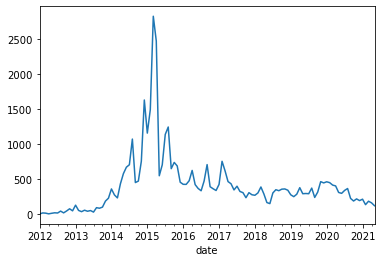

In [65]:
df.set_index('date').resample('M')['id'].count().plot()

<AxesSubplot:xlabel='date'>

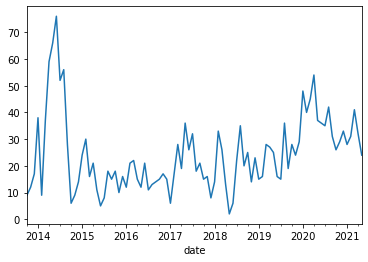

In [66]:
df[df.emoji=="❤️"].set_index('date').resample('M')['id'].count().plot()

<AxesSubplot:xlabel='date'>

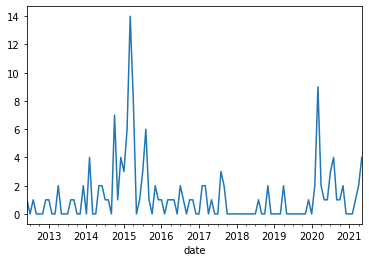

In [67]:
df[df.emoji=="😷"].set_index('date').resample('M')['id'].count().plot()

<AxesSubplot:xlabel='date'>

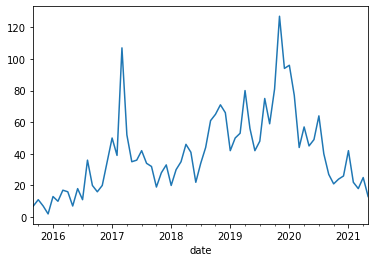

In [68]:
df[df.emoji=="🇳🇵"].set_index('date').resample('M')['id'].count().plot()

<AxesSubplot:xlabel='date'>

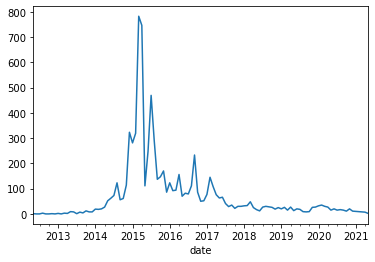

In [69]:
df[df.emoji=="😂"].set_index('date').resample('M')['id'].count().plot()

In [93]:
location_tweet = df.dropna(subset=['place'])

In [99]:
import json
import math

def getlatlon(row):
    place = row.place
    place = place.replace("\'", "\"")
    place = json.loads(place)
    lat = place['coordinates'][0]
    lon = place['coordinates'][1]
    return pd.Series([lat, lon],index=['lat','lon'])

In [103]:
df = df.join(location_tweet.apply(getlatlon, axis=1, result_type="expand"))

In [105]:
df.to_csv('location.csv', index=False)

In [106]:
df

,id,emoji,date,username,tweet,likes_count,place,lat,lon
0,1398437418768818176,👌,2021-05-29,dendikapan,शुभ बिहानी ☕️☕️ शुभदिनकाे कामना🙏😷👌🇳🇵💞 Hopefull...,3,NaN,NaN,NaN
1,1397792077149216769,👌,2021-05-27,dendikapan,@damanbro66 Yes I like it 👌so much your post ...,0,NaN,NaN,NaN
2,1397341721566990336,👌,2021-05-26,dendikapan,@KiranCh77 Really nice 👌thanks for sharing 👌 ...,0,NaN,NaN,NaN
3,1394863068035813379,👌,2021-05-19,iammuhnaj,It's still Bull season👌 @ 𝙃𝙊𝙈𝙀 https://t.co/O...,1,"{'type': 'Point', 'coordinates': [27.713776, 8...",27.713776,85.310244
4,1393821979032133635,👌,2021-05-16,chetan_karki,#just #fun with #baby #myrahsofkarki 😊❤️ looki...,0,"{'type': 'Point', 'coordinates': [27.67733347,...",27.677333,85.307636
...,...,...,...,...,...,...,...,...,...
45362,389751359874289664,❤️,2013-10-14,ashmoo_moo,#littleone #cuteness #dashain #tika #sister #c...,0,"{'type': 'Point', 'coordinates': [27.73048071,...",27.730481,85.330964
45363,389704517815902208,❤️,2013-10-14,ashmoo_moo,Baba. Prajjwal Dai. ❤️ #dashain #tika #family ...,0,"{'type': 'Point', 'coordinates': [27.73855019,...",27.738550,85.338760
45364,387917234490048512,❤️,2013-10-09,ashmoo_moo,#brother #cousins #mamaghar #nagpokhari #morni...,0,"{'type': 'Point', 'coordinates': [27.71356987,...",27.713570,85.324463
45365,387542385145954304,❤️,2013-10-08,ashmoo_moo,#cuteness #babysister #cousins #smile ❤️😘💋 @ M...,0,"{'type': 'Point', 'coordinates': [27.7090305, ...",27.709031,85.326469


In [108]:
df.emoji.value_counts()

😂     7576
😊     4016
😍     3781
😁     3482
🇳🇵    2785
😎     2270
❤️    2233
🙏     2122
😉     2000
😜     1463
😘     1432
😋     1241
💕     1173
😄     1095
👍     1001
👌      730
😭      637
😏      554
✌️     505
😒      483
💞      461
😇      432
🙌      423
☺️     375
😔      373
😌      332
😱      314
😑      296
😈      292
🙈      291
☕      277
🌞      213
😳      185
😩      181
😴      163
😷      135
👶       45
Name: emoji, dtype: int64